In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
train = pd.read_csv("/content/sample_data/train_ctrUa4K.csv")
test=pd.read_csv("/content/sample_data/test_lAUu6dG.csv")

In [64]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [66]:
train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [67]:
train['Gender'] = train["Gender"].map({"Male": 1, "Female": 0})
train['Married'] = train["Married"].map({"Yes": 1, "No": 0})
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['Dependents']=train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3}).astype(float)
train['Education'] = train["Education"].map({"Graduate": 1, "Not Graduate": 0})
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})
train['Self_Employed'] = train["Self_Employed"].map({"Yes": 1, "No": 0})

In [68]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
 13  total_income       614 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 67.3+ KB


In [48]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

<Axes: xlabel='Property_Area'>

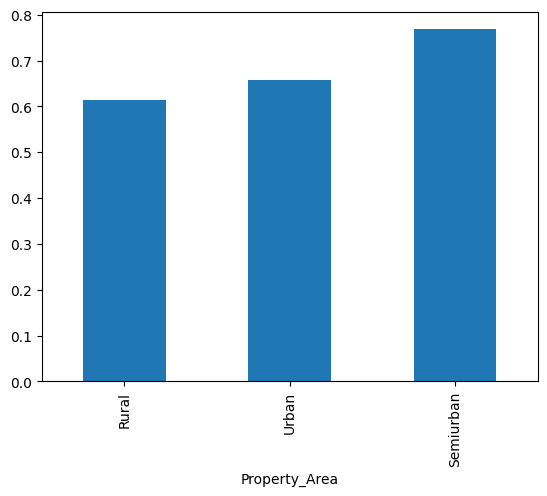

In [53]:
rate = train.groupby("Property_Area")["Loan_Status"].mean().sort_values()
rate.plot(kind="bar")

In [62]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

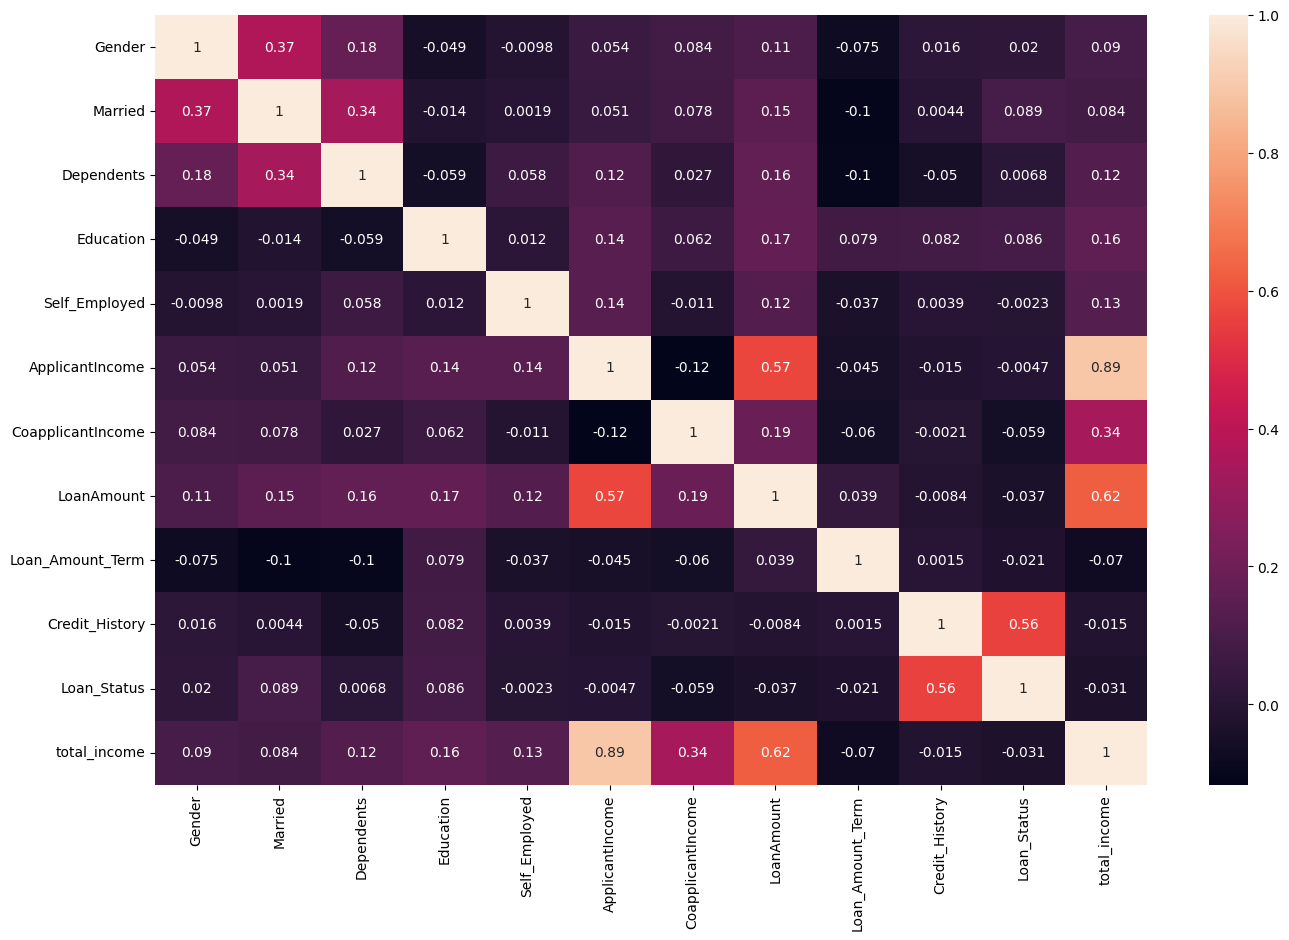

In [71]:
plt.figure(figsize=(16, 10))
sns.heatmap(train.select_dtypes(include=['number']).corr(),annot=True)
plt.show()

In [73]:
train.drop(["ApplicantIncome", "CoapplicantIncome", "Loan_ID"], axis=1, inplace=True)

In [74]:
x=train.drop(['Loan_Status'], axis=1)

In [75]:
y=train['Loan_Status']

In [76]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,total_income
0,1.0,0.0,0.0,1,0.0,NaN,360.0,1.0,Urban,5849.0
1,1.0,1.0,1.0,1,0.0,128.0,360.0,1.0,Rural,6091.0
2,1.0,1.0,0.0,1,1.0,66.0,360.0,1.0,Urban,3000.0
3,1.0,1.0,0.0,0,0.0,120.0,360.0,1.0,Urban,4941.0
4,1.0,0.0,0.0,1,0.0,141.0,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,71.0,360.0,1.0,Rural,2900.0
610,1.0,1.0,3.0,1,0.0,40.0,180.0,1.0,Rural,4106.0
611,1.0,1.0,1.0,1,0.0,253.0,360.0,1.0,Urban,8312.0
612,1.0,1.0,2.0,1,0.0,187.0,360.0,1.0,Urban,7583.0


In [77]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [78]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [79]:
num_cols = x.select_dtypes(include='number').columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

print ('Numerical columns: ', num_cols)
print ('Categorical columns: ', cat_cols)

Numerical columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'total_income']
Categorical columns:  ['Property_Area']


In [80]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# numeric imputation
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [82]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('scaler', numeric_pipeline, num_cols),
    ('onehot_encoder', onehot_pipeline, cat_cols)
])

In [83]:
model_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression())
])

In [84]:
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'total_income']),
                                                 ('onehot_encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Property_Area'])])),
                ('model', LogisticRegression())])

In [85]:
model_pipeline.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [87]:
y_test_predict=model_pipeline.predict(x_test)
y_train_predict=model_pipeline.predict(x_train)

In [89]:
# --- TRAIN ---
print("===== TRAIN =====")
print("Accuracy:", accuracy_score(y_train, y_train_predict))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_predict))
print("Report:\n", classification_report(y_train, y_train_predict))

# --- TEST ---
print("\n===== TEST =====")
print("Accuracy:", accuracy_score(y_test, y_test_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_predict))
print("Report:\n", classification_report(y_test, y_test_predict))

===== TRAIN =====
Accuracy: 0.8167006109979633
Confusion Matrix:
 [[ 65  84]
 [  6 336]]
Report:
               precision    recall  f1-score   support

           0       0.92      0.44      0.59       149
           1       0.80      0.98      0.88       342

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491


===== TEST =====
Accuracy: 0.7804878048780488
Confusion Matrix:
 [[18 25]
 [ 2 78]]
Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

